In [1]:
# Quickstart code from coinmarketcap for Python
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os
import time

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'd6e900b1-64ed-4adf-b52a-12613972b1e5',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-07-16T15:54:59.001Z', 'error_code': 0, 'error_message': None, 'elapsed': 21, 'credit_count': 1, 'notice': None, 'total_count': 10157}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10342, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [2]:
# normalizing data in a dataframe
import pandas as pd

pd.set_option('display.max_columns', None)
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10342,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.943090e+07,1.943090e+07,False,NaN,1,NaN,NaN,None,2023-07-16T15:53:00.000Z,30391.934911,7.978130e+09,-50.4481,0.014718,0.222471,0.115594,18.917766,13.589249,3.586081,5.905426e+11,48.3801,6.382306e+11,None,2023-07-16T15:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 16:55:00.810949
1,1027,Ethereum,ETH,ethereum,7124,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202002e+08,1.202002e+08,True,NaN,2,NaN,NaN,None,2023-07-16T15:53:00.000Z,1937.622628,4.124316e+09,-48.4945,-0.067191,0.044329,3.808489,16.432294,7.931552,-6.384998,2.329026e+11,19.0815,2.329026e+11,None,2023-07-16T15:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 16:55:00.810949
2,825,Tether,USDT,tether,56974,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.363837e+10,8.671579e+10,True,NaN,3,NaN,NaN,None,2023-07-16T15:53:00.000Z,1.000620,1.665178e+10,-47.0424,0.008396,0.034549,0.007073,0.201611,0.065383,0.033029,8.369024e+10,6.8589,8.676956e+10,None,2023-07-16T15:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-16 16:55:00.810949
3,52,XRP,XRP,xrp,993,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.254409e+10,9.998862e+10,False,NaN,4,NaN,NaN,None,2023-07-16T15:53:00.000Z,0.769802,3.414501e+09,-33.0070,0.563092,6.323702,63.618500,66.656695,74.750015,51.403892,4.044853e+10,3.3139,7.698018e+10,None,2023-07-16T15:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 16:55:00.810949
4,1839,BNB,BNB,bnb,1506,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558487e+08,1.558487e+08,False,NaN,5,NaN,NaN,None,2023-07-16T15:53:00.000Z,248.943454,3.928041e+08,-33.7816,-0.032039,-0.628689,6.143708,5.062376,-19.360728,-26.520770,3.879752e+10,3.1786,3.879752e+10,None,2023-07-16T15:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 16:55:00.810949
5,3408,USD Coin,USDC,usd-coin,13332,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.728106e+10,2.728106e+10,False,NaN,6,NaN,NaN,None,2023-07-16T15:53:00.000Z,1.000224,2.027700e+09,-44.3999,0.011775,0.025207,-0.007431,0.015907,0.035357,0.053140,2.728716e+10,2.2356,2.728716e+10,None,2023-07-16T15:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-16 16:55:00.810949
6,5426,Solana,SOL,solana,486,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.026838e+08,5.526208e+08,True,NaN,7,NaN,NaN,None,2023-07-16T15:53:00.000Z,28.081374,8.679208e+08,-47.0051,-1.020385,1.156804,32.468254,89.667754,36.589763,14.855423,1.130791e+10,0.9264,1.551835e+10,None,2023-07-16T15:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 16:55:00.810949
7,2010,Cardano,ADA,cardano,871,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.497646e+10,3.598361e+10,False,NaN,8,NaN,NaN,None,2023-07-16T15:53:00.000Z,0.321099,2.707150e+08,-40.7281,-0.544003,-3.155565,12.029011,24.789526,-12.371906,-26.022443,1.123090e+10,0.9201,1.444944e+10,None,2023-07-16T15:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 16:55:00.810949
8,74,Dogecoin,DOGE,dogecoin,743,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.40

In [3]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
    }
    headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'd6e900b1-64ed-4adf-b52a-12613972b1e5',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    #df = pd.concat([df, df2], ignore_index=True)
    df_append = pd.DataFrame(df2)
    df = pd.concat([df,df_append])

    if not os.path.isfile(r'C:\Users\hashe\OneDrive\Documents\Southampton Uni\Summer Projects\Crypto API pull\API.csv'):
        df.to_csv(r'C:\Users\hashe\OneDrive\Documents\Southampton Uni\Summer Projects\Crypto API pull\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\hashe\OneDrive\Documents\Southampton Uni\Summer Projects\Crypto API pull\API.csv', mode='a', header=False)

In [4]:

for i in range(200):
    api_runner()
    print('API has been ran successfully.')
    time.sleep(60)
exit()

{'status': {'timestamp': '2023-07-16T15:54:59.548Z', 'error_code': 0, 'error_message': None, 'elapsed': 17, 'credit_count': 1, 'notice': None, 'total_count': 10157}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10342, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

KeyboardInterrupt: 

In [5]:
df.head(None)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10342,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.943090e+07,1.943090e+07,False,NaN,1,NaN,NaN,None,2023-07-16T15:53:00.000Z,30391.934911,7.978130e+09,-50.4481,0.014718,0.222471,0.115594,18.917766,13.589249,3.586081,5.905426e+11,48.3801,6.382306e+11,None,2023-07-16T15:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 16:55:00.810949
1,1027,Ethereum,ETH,ethereum,7124,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202002e+08,1.202002e+08,True,NaN,2,NaN,NaN,None,2023-07-16T15:53:00.000Z,1937.622628,4.124316e+09,-48.4945,-0.067191,0.044329,3.808489,16.432294,7.931552,-6.384998,2.329026e+11,19.0815,2.329026e+11,None,2023-07-16T15:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 16:55:00.810949
2,825,Tether,USDT,tether,56974,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.363837e+10,8.671579e+10,True,NaN,3,NaN,NaN,None,2023-07-16T15:53:00.000Z,1.000620,1.665178e+10,-47.0424,0.008396,0.034549,0.007073,0.201611,0.065383,0.033029,8.369024e+10,6.8589,8.676956e+10,None,2023-07-16T15:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-16 16:55:00.810949
3,52,XRP,XRP,xrp,993,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.254409e+10,9.998862e+10,False,NaN,4,NaN,NaN,None,2023-07-16T15:53:00.000Z,0.769802,3.414501e+09,-33.0070,0.563092,6.323702,63.618500,66.656695,74.750015,51.403892,4.044853e+10,3.3139,7.698018e+10,None,2023-07-16T15:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 16:55:00.810949
4,1839,BNB,BNB,bnb,1506,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558487e+08,1.558487e+08,False,NaN,5,NaN,NaN,None,2023-07-16T15:53:00.000Z,248.943454,3.928041e+08,-33.7816,-0.032039,-0.628689,6.143708,5.062376,-19.360728,-26.520770,3.879752e+10,3.1786,3.879752e+10,None,2023-07-16T15:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 16:55:00.810949
5,3408,USD Coin,USDC,usd-coin,13332,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.728106e+10,2.728106e+10,False,NaN,6,NaN,NaN,None,2023-07-16T15:53:00.000Z,1.000224,2.027700e+09,-44.3999,0.011775,0.025207,-0.007431,0.015907,0.035357,0.053140,2.728716e+10,2.2356,2.728716e+10,None,2023-07-16T15:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-16 16:55:00.810949
6,5426,Solana,SOL,solana,486,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.026838e+08,5.526208e+08,True,NaN,7,NaN,NaN,None,2023-07-16T15:53:00.000Z,28.081374,8.679208e+08,-47.0051,-1.020385,1.156804,32.468254,89.667754,36.589763,14.855423,1.130791e+10,0.9264,1.551835e+10,None,2023-07-16T15:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 16:55:00.810949
7,2010,Cardano,ADA,cardano,871,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.497646e+10,3.598361e+10,False,NaN,8,NaN,NaN,None,2023-07-16T15:53:00.000Z,0.321099,2.707150e+08,-40.7281,-0.544003,-3.155565,12.029011,24.789526,-12.371906,-26.022443,1.123090e+10,0.9201,1.444944e+10,None,2023-07-16T15:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 16:55:00.810949
8,74,Dogecoin,DOGE,dogecoin,743,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.40

In [6]:
# Changing figures from scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.head(5)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10342,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19430900.00000,19430900.00000,False,NaN,1,NaN,NaN,None,2023-07-16T15:53:00.000Z,30391.93491,7978129595.52768,-50.44810,0.01472,0.22247,0.11559,18.91777,13.58925,3.58608,590542648057.33142,48.38010,638230633125.79004,None,2023-07-16T15:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 16:55:00.810949
1,1027,Ethereum,ETH,ethereum,7124,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120200189.25430,120200189.25430,True,NaN,2,NaN,NaN,None,2023-07-16T15:53:00.000Z,1937.62263,4124315740.37488,-48.49450,-0.06719,0.04433,3.80849,16.43229,7.93155,-6.38500,232902606643.86713,19.08150,232902606643.87000,None,2023-07-16T15:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 16:55:00.810949
2,825,Tether,USDT,tether,56974,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83638374850.95830,86715788906.06107,True,NaN,3,NaN,NaN,None,2023-07-16T15:53:00.000Z,1.00062,16651782063.07175,-47.04240,0.00840,0.03455,0.00707,0.20161,0.06538,0.03303,83690240439.19623,6.85890,86769562851.44000,None,2023-07-16T15:53:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-16 16:55:00.810949
3,52,XRP,XRP,xrp,993,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52544091958.00000,99988621362.00000,False,NaN,4,NaN,NaN,None,2023-07-16T15:53:00.000Z,0.76980,3414501412.34257,-33.00700,0.56309,6.32370,63.61850,66.65670,74.75001,51.40389,40448534202.63338,3.31390,76980175497.11000,None,2023-07-16T15:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 16:55:00.810949
4,1839,BNB,BNB,bnb,1506,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155848737.11659,155848737.11659,False,NaN,5,NaN,NaN,None,2023-07-16T15:53:00.000Z,248.94345,392804100.47703,-33.78160,-0.03204,-0.62869,6.14371,5.06238,-19.36073,-26.52077,38797522923.70332,3.17860,38797522923.70000,None,2023-07-16T15:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-16 16:55:00.810949


In [17]:
# Grouping cryptocurrencies by their percentage changes in various time frames, as a seperate dataframe, this dataframe will be used for visual analytics
df1 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h',
                                'quote.USD.percent_change_24h',
                                'quote.USD.percent_change_7d',
                                'quote.USD.percent_change_30d',
                                'quote.USD.percent_change_60d',
                                'quote.USD.percent_change_90d']].mean()
df1

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.00703,0.21471,0.11245,18.86006,13.58027,3.55497
Ethereum,-0.07914,0.03770,3.80943,16.37257,7.92641,-6.41719
Tether,0.00584,0.02417,-0.00081,0.18599,0.06267,0.02478
XRP,0.58767,6.32629,63.63192,66.65751,74.77082,51.42518
BNB,-0.04270,-0.64496,6.13364,5.01716,-19.36985,-26.52812
USD Coin,0.00702,0.01716,-0.01225,-0.00116,0.03479,0.05110
Solana,-0.98054,1.15190,32.42699,89.63077,36.61300,14.88173
Cardano,-0.55375,-3.17865,12.02070,24.76927,-12.38648,-26.02565
Dogecoin,-0.37283,-2.52053,8.22169,15.95441,-2.87853,-21.24627


In [19]:
# Viewing currencies as a stack for easier analysis
df1 = df1.stack()
df1

name                                      
Bitcoin       quote.USD.percent_change_1h      0.00703
              quote.USD.percent_change_24h     0.21471
              quote.USD.percent_change_7d      0.11245
              quote.USD.percent_change_30d    18.86006
              quote.USD.percent_change_60d    13.58027
                                                ...   
Bitcoin Cash  quote.USD.percent_change_24h     2.07083
              quote.USD.percent_change_7d     -4.33141
              quote.USD.percent_change_30d   147.39564
              quote.USD.percent_change_60d   119.86796
              quote.USD.percent_change_90d    95.93726
Length: 90, dtype: float64

In [20]:
# df1 is now series, not a dataframe
type(df1)

pandas.core.series.Series

In [21]:
# Converting df1 to a dataframe
df1 = df1.to_frame(name='values')
df1.head(None)

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.00703
             quote.USD.percent_change_24h   0.21471
             quote.USD.percent_change_7d    0.11245
             quote.USD.percent_change_30d  18.86006
             quote.USD.percent_change_60d  13.58027
...                                             ...
Bitcoin Cash quote.USD.percent_change_24h   2.07083
             quote.USD.percent_change_7d   -4.33141
             quote.USD.percent_change_30d 147.39564
             quote.USD.percent_change_60d 119.86796
             quote.USD.percent_change_90d  95.93726

[90 rows x 1 columns]

In [22]:
# indexing dataset
index = pd.Index(range(90))

df1 = df1.reset_index()
df1

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.00703
1,Bitcoin,quote.USD.percent_change_24h,0.21471
2,Bitcoin,quote.USD.percent_change_7d,0.11245
3,Bitcoin,quote.USD.percent_change_30d,18.86006
4,Bitcoin,quote.USD.percent_change_60d,13.58027
...,...,...,...
85,Bitcoin Cash,quote.USD.percent_change_24h,2.07083
86,Bitcoin Cash,quote.USD.percent_change_7d,-4.33141
87,Bitcoin Cash,quote.USD.percent_change_30d,147.39564
88,Bitcoin Cash,quote.USD.percent_change_60d,119.86796


In [23]:
# Renaming column to an appropriate name
df1 = df1.rename(columns={'level_1': 'percent_change'})
df1

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.00703
1,Bitcoin,quote.USD.percent_change_24h,0.21471
2,Bitcoin,quote.USD.percent_change_7d,0.11245
3,Bitcoin,quote.USD.percent_change_30d,18.86006
4,Bitcoin,quote.USD.percent_change_60d,13.58027
...,...,...,...
85,Bitcoin Cash,quote.USD.percent_change_24h,2.07083
86,Bitcoin Cash,quote.USD.percent_change_7d,-4.33141
87,Bitcoin Cash,quote.USD.percent_change_30d,147.39564
88,Bitcoin Cash,quote.USD.percent_change_60d,119.86796


In [39]:
# Importing visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.mlab as mlab
from matplotlib.pyplot import figure

In [31]:
mapping = {
    'quote.USD.percent_change_1h': '1h',
    'quote.USD.percent_change_24h': '24h',
    'quote.USD.percent_change_7d': '7d',
    'quote.USD.percent_change_30d': '30d',
    'quote.USD.percent_change_60d': '60d',
    'quote.USD.percent_change_90d': '90d'
}
   
df1 = df1.rename(columns=mapping)
df = df.rename(columns=mapping)

df1

,name,percent_change,values
0,Bitcoin,1h,0.00703
1,Bitcoin,24h,0.21471
2,Bitcoin,7d,0.11245
3,Bitcoin,30d,18.86006
4,Bitcoin,60d,13.58027
...,...,...,...
85,Bitcoin Cash,24h,2.07083
86,Bitcoin Cash,7d,-4.33141
87,Bitcoin Cash,30d,147.39564
88,Bitcoin Cash,60d,119.86796


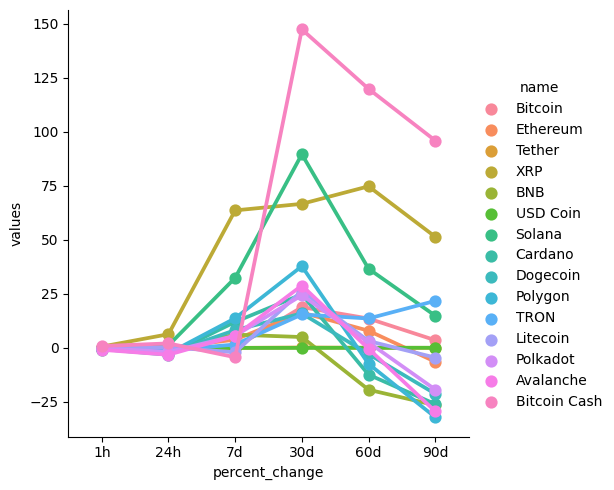

In [33]:
sns.catplot(x='percent_change', y='values', hue='name', data=df1, kind='point')

In [36]:
df = df[['name', 'quote.USD.price', 'timestamp']]
df2 = df.query('name == \'Bitcoin\'')
df2

,name,quote.USD.price,timestamp
0,Bitcoin,30391.93491,2023-07-16 16:55:00.810949
0,Bitcoin,30391.93491,2023-07-16 16:55:00.995147
0,Bitcoin,30385.54678,2023-07-16 16:56:02.198827
0,Bitcoin,30389.04275,2023-07-16 16:57:03.409218


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

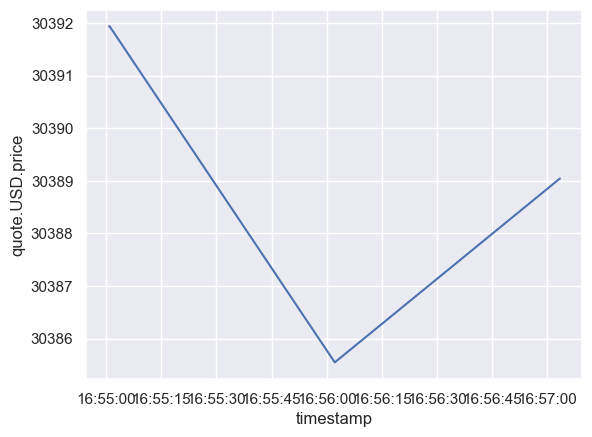

In [38]:
# shows bitcoin dependent on run time of api runner loop
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data=df2)